In [1]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

Using TensorFlow backend.


*1. Import the data and tokenize to use with Keras.*

In [35]:
train_df = pd.read_csv('data/congress_train.csv', encoding='ISO-8859-1')
valid_df = pd.read_csv('data/congress_val.csv', encoding='ISO-8859-1')
test_df = pd.read_csv('data/congress_test.csv', encoding='ISO-8859-1')

In [50]:
train_words = []
valid_words = []
test_words = []
for title in list(train_df['Title']):
    train_words.append(str(title))
for title in list(valid_df['Title']):
    valid_words.append(str(title))
for title in list(valid_df['Title']):
    test_words.append(str(title))

In [51]:
train_y = to_categorical(list(train_df['Major']))
valid_y = to_categorical(list(valid_df['Major']))
test_y = to_categorical(list(valid_df['Major']))

In [52]:
#Keep only the 10000 most frequent words
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_words)

In [53]:
#Limit each bill's title to a maximum length of 100 words
#Pad each sequence to be of length 100
train_seq = tokenizer.texts_to_sequences(train_words)
test_seq = tokenizer.texts_to_sequences(test_words)
valid_seq = tokenizer.texts_to_sequences(valid_words)

In [54]:
train_x = pad_sequences(train_seq, maxlen=100)
test_x = pad_sequences(test_seq, maxlen=100)
valid_x = pad_sequences(valid_seq, maxlen=100)

*2. Use a task-specific embedding layer with an appropriate number of output dimensions*

*3. Estimate a basic feed-forward network*

In [40]:
from keras.layers import Embedding, Flatten, Dense
from keras.models import Sequential

In [81]:
ffn = Sequential()
ffn.add(Embedding(10000, 25, input_length=100))
ffn.add(Flatten())
ffn.add(Dense(24, activation='softmax'))
ffn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_ffn = ffn.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=50, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/50
278612/278612 [==============================] - 7s 27us/step - loss: 1.8746 - acc: 0.4891 - val_loss: 1.0860 - val_acc: 0.7193
Epoch 2/50
278612/278612 [==============================] - 6s 20us/step - loss: 0.8514 - acc: 0.7779 - val_loss: 0.7463 - val_acc: 0.8012
Epoch 3/50
278612/278612 [==============================] - 6s 22us/step - loss: 0.6629 - acc: 0.8213 - val_loss: 0.6623 - val_acc: 0.8240
Epoch 4/50
278612/278612 [==============================] - 6s 22us/step - loss: 0.5896 - acc: 0.8399 - val_loss: 0.6255 - val_acc: 0.8319
Epoch 5/50
278612/278612 [==============================] - 6s 22us/step - loss: 0.5447 - acc: 0.8509 - val_loss: 0.6047 - val_acc: 0.8380
Epoch 6/50
278612/278612 [==============================] - 6s 22us/step - loss: 0.5128 - acc: 0.8585 - val_loss: 0.5934 - val_acc: 0.8414
Epoch 7/50
278612/278612 [==============================] - 6s 22us/step - loss: 0.4879 - acc: 0.8657 - val_loss: 0

*4. Estimate a recurrent neural network (RNN) with a layer_simple_rnn*

In [57]:
from keras.layers import SimpleRNN

In [59]:
rnn = Sequential()
rnn.add(Embedding(10000, 25, input_length=100))
rnn.add(SimpleRNN(25))
rnn.add(Dense(24, activation='softmax'))
rnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_rnn = rnn.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=50, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/50
278612/278612 [==============================] - 27s 96us/step - loss: 2.3740 - acc: 0.3132 - val_loss: 1.7509 - val_acc: 0.4955
Epoch 2/50
278612/278612 [==============================] - 26s 95us/step - loss: 1.4785 - acc: 0.5869 - val_loss: 1.3434 - val_acc: 0.6329
Epoch 3/50
278612/278612 [==============================] - 27s 95us/step - loss: 1.2144 - acc: 0.6779 - val_loss: 1.1798 - val_acc: 0.6845
Epoch 4/50
278612/278612 [==============================] - 26s 95us/step - loss: 1.0309 - acc: 0.7342 - val_loss: 1.1657 - val_acc: 0.6776
Epoch 5/50
278612/278612 [==============================] - 26s 95us/step - loss: 0.9261 - acc: 0.7626 - val_loss: 1.0047 - val_acc: 0.7370
Epoch 6/50
278612/278612 [==============================] - 27s 95us/step - loss: 0.8646 - acc: 0.7785 - val_loss: 0.9307 - val_acc: 0.7600
Epoch 7/50
278612/278612 [==============================] - 26s 95us/step - loss: 0.8078 - acc: 0.7944 - val_

*5. Estimate an RNN with an LSTM layer*

In [60]:
from keras.layers import LSTM

lstm = Sequential()
lstm.add(Embedding(10000, 25, input_length=100))
lstm.add(LSTM(25))
lstm.add(Dense(24, activation='softmax'))
lstm.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_lstm = lstm.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=50, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/50
278612/278612 [==============================] - 4093s 15ms/step - loss: 2.3026 - acc: 0.3026 - val_loss: 1.7473 - val_acc: 0.5101
Epoch 2/50
278612/278612 [==============================] - 75s 270us/step - loss: 1.3818 - acc: 0.6260 - val_loss: 1.2074 - val_acc: 0.6801
Epoch 3/50
278612/278612 [==============================] - 73s 263us/step - loss: 0.9714 - acc: 0.7564 - val_loss: 0.8821 - val_acc: 0.7819
Epoch 4/50
278612/278612 [==============================] - 71s 254us/step - loss: 0.7894 - acc: 0.8037 - val_loss: 0.7736 - val_acc: 0.8073
Epoch 5/50
278612/278612 [==============================] - 70s 251us/step - loss: 0.6971 - acc: 0.8234 - val_loss: 0.7779 - val_acc: 0.7996
Epoch 6/50
278612/278612 [==============================] - 71s 254us/step - loss: 0.6402 - acc: 0.8353 - val_loss: 0.6795 - val_acc: 0.8261
Epoch 7/50
278612/278612 [==============================] - 75s 268us/step - loss: 0.6006 - acc: 0.844

*6. Estimate an RNN with a GRU layer*

In [61]:
from keras.layers import GRU

gru = Sequential()
gru.add(Embedding(10000, 25, input_length=100))
gru.add(GRU(25))
gru.add(Dense(24, activation='softmax'))
gru.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_gru = gru.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=50, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/50
278612/278612 [==============================] - 66s 237us/step - loss: 2.4846 - acc: 0.2287 - val_loss: 2.1079 - val_acc: 0.3475
Epoch 2/50
278612/278612 [==============================] - 63s 227us/step - loss: 1.7275 - acc: 0.5006 - val_loss: 1.4107 - val_acc: 0.6004
Epoch 3/50
278612/278612 [==============================] - 65s 233us/step - loss: 1.2263 - acc: 0.6657 - val_loss: 1.1093 - val_acc: 0.7020
Epoch 4/50
278612/278612 [==============================] - 67s 242us/step - loss: 0.9589 - acc: 0.7530 - val_loss: 0.8989 - val_acc: 0.7709
Epoch 5/50
278612/278612 [==============================] - 65s 234us/step - loss: 0.7906 - acc: 0.7994 - val_loss: 0.7747 - val_acc: 0.8042
Epoch 6/50
278612/278612 [==============================] - 178s 640us/step - loss: 0.6993 - acc: 0.8197 - val_loss: 0.7158 - val_acc: 0.8174
Epoch 7/50
278612/278612 [==============================] - 4784s 17ms/step - loss: 0.6409 - acc: 0.83

*7. Estimate five additional neural network models with different configurations of hyperparameters*

In [63]:
model1 = Sequential()
model1.add(Embedding(10000, 25, input_length=100))
model1.add(SimpleRNN(25, return_sequences=True))
model1.add(SimpleRNN(25))
model1.add(Dense(24, activation='softmax'))
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_model1 = model1.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=25, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/25
278612/278612 [==============================] - 57s 204us/step - loss: 2.1274 - acc: 0.3818 - val_loss: 1.5338 - val_acc: 0.5780
Epoch 2/25
278612/278612 [==============================] - 56s 200us/step - loss: 1.3324 - acc: 0.6418 - val_loss: 1.2489 - val_acc: 0.6670
Epoch 3/25
278612/278612 [==============================] - 54s 193us/step - loss: 1.0594 - acc: 0.7223 - val_loss: 1.1838 - val_acc: 0.6810
Epoch 4/25
278612/278612 [==============================] - 55s 198us/step - loss: 0.9109 - acc: 0.7634 - val_loss: 0.9827 - val_acc: 0.7416
Epoch 5/25
278612/278612 [==============================] - 55s 197us/step - loss: 0.8176 - acc: 0.7887 - val_loss: 1.1511 - val_acc: 0.6858
Epoch 6/25
278612/278612 [==============================] - 56s 201us/step - loss: 0.7588 - acc: 0.8037 - val_loss: 0.8793 - val_acc: 0.7728
Epoch 7/25
278612/278612 [==============================] - 57s 206us/step - loss: 0.7201 - acc: 0.8135

In [68]:
model2 = Sequential()
model2.add(Embedding(10000, 25, input_length=100))
model2.add(LSTM(25, return_sequences=True))
model2.add(LSTM(25))
model2.add(Dense(24, activation='softmax'))
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_model2 = model2.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=25, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/25
278612/278612 [==============================] - 154s 552us/step - loss: 2.2230 - acc: 0.3419 - val_loss: 1.7351 - val_acc: 0.5015
Epoch 2/25
278612/278612 [==============================] - 162s 581us/step - loss: 1.4074 - acc: 0.6121 - val_loss: 1.2532 - val_acc: 0.6616
Epoch 3/25
278612/278612 [==============================] - 148s 533us/step - loss: 1.0517 - acc: 0.7258 - val_loss: 1.0756 - val_acc: 0.7182
Epoch 4/25
278612/278612 [==============================] - 152s 544us/step - loss: 0.8625 - acc: 0.7798 - val_loss: 0.8791 - val_acc: 0.7720
Epoch 5/25
278612/278612 [==============================] - 153s 551us/step - loss: 0.7498 - acc: 0.8086 - val_loss: 0.7641 - val_acc: 0.8031
Epoch 6/25
278612/278612 [==============================] - 149s 534us/step - loss: 0.6772 - acc: 0.8252 - val_loss: 0.7114 - val_acc: 0.8157
Epoch 7/25
278612/278612 [==============================] - 147s 529us/step - loss: 0.6269 - acc:

In [71]:
model3 = Sequential()
model3.add(Embedding(10000, 25, input_length=100))
model3.add(SimpleRNN(25, dropout=0.3))
model3.add(Dense(24, activation='softmax'))
model3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_model3 = model3.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=25, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/25
278612/278612 [==============================] - 30s 107us/step - loss: 2.3317 - acc: 0.3014 - val_loss: 1.7767 - val_acc: 0.4629
Epoch 2/25
278612/278612 [==============================] - 29s 102us/step - loss: 1.6292 - acc: 0.5322 - val_loss: 1.4106 - val_acc: 0.6082
Epoch 3/25
278612/278612 [==============================] - 29s 103us/step - loss: 1.3952 - acc: 0.6128 - val_loss: 1.3144 - val_acc: 0.6477
Epoch 4/25
278612/278612 [==============================] - 29s 103us/step - loss: 1.2855 - acc: 0.6475 - val_loss: 1.2207 - val_acc: 0.6723
Epoch 5/25
278612/278612 [==============================] - 29s 104us/step - loss: 1.2151 - acc: 0.6697 - val_loss: 1.2163 - val_acc: 0.6736
Epoch 6/25
278612/278612 [==============================] - 29s 105us/step - loss: 1.1578 - acc: 0.6874 - val_loss: 1.0999 - val_acc: 0.7081
Epoch 7/25
278612/278612 [==============================] - 29s 105us/step - loss: 1.1030 - acc: 0.7053

In [73]:
model4 = Sequential()
model4.add(Embedding(10000, 25, input_length=100))
model4.add(LSTM(25, dropout=0.3))
model4.add(Dense(24, activation='softmax'))
model4.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_model4 = model4.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=25, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/25
278612/278612 [==============================] - 78s 280us/step - loss: 2.2343 - acc: 0.3404 - val_loss: 1.7915 - val_acc: 0.4814
Epoch 2/25
278612/278612 [==============================] - 77s 277us/step - loss: 1.3589 - acc: 0.6303 - val_loss: 1.0748 - val_acc: 0.7220
Epoch 3/25
278612/278612 [==============================] - 77s 276us/step - loss: 0.9963 - acc: 0.7463 - val_loss: 0.8555 - val_acc: 0.7879
Epoch 4/25
278612/278612 [==============================] - 78s 279us/step - loss: 0.8409 - acc: 0.7889 - val_loss: 0.7753 - val_acc: 0.8060
Epoch 5/25
278612/278612 [==============================] - 78s 281us/step - loss: 0.7610 - acc: 0.8064 - val_loss: 0.7301 - val_acc: 0.8130
Epoch 6/25
278612/278612 [==============================] - 79s 282us/step - loss: 0.7108 - acc: 0.8176 - val_loss: 0.7030 - val_acc: 0.8186
Epoch 7/25
278612/278612 [==============================] - 78s 281us/step - loss: 0.6763 - acc: 0.8244

In [75]:
model5 = Sequential()
model5.add(Embedding(10000, 25, input_length=100))
model5.add(GRU(25, dropout=0.3))
model5.add(Dense(24, activation='softmax'))
model5.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_model5 = model5.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=25, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/25
278612/278612 [==============================] - 85s 304us/step - loss: 2.4753 - acc: 0.2468 - val_loss: 1.9476 - val_acc: 0.4515
Epoch 2/25
278612/278612 [==============================] - 82s 294us/step - loss: 1.6597 - acc: 0.5441 - val_loss: 1.3579 - val_acc: 0.6357
Epoch 3/25
278612/278612 [==============================] - 78s 281us/step - loss: 1.1924 - acc: 0.6903 - val_loss: 0.9927 - val_acc: 0.7522
Epoch 4/25
278612/278612 [==============================] - 77s 276us/step - loss: 0.9666 - acc: 0.7568 - val_loss: 0.8713 - val_acc: 0.7828
Epoch 5/25
278612/278612 [==============================] - 84s 302us/step - loss: 0.8595 - acc: 0.7841 - val_loss: 0.8023 - val_acc: 0.7994
Epoch 6/25
278612/278612 [==============================] - 84s 303us/step - loss: 0.7888 - acc: 0.8002 - val_loss: 0.7751 - val_acc: 0.8011
Epoch 7/25
278612/278612 [==============================] - 84s 300us/step - loss: 0.7395 - acc: 0.8098

*8.For each model, plot the validation loss and accuracy over each epoch.*

In [77]:
import matplotlib.pyplot as plt

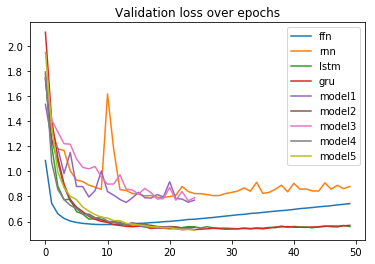

In [82]:
models_list = [result_ffn, result_rnn, result_lstm, result_gru, result_model1, result_model2, result_model3, result_model4, result_model5]

for model in models_list:
    plt.plot(model.history['val_loss'])
    
plt.legend(['ffn', 'rnn', 'lstm', 'gru', 'model1', 'model2', 'model3', 'model4', 'model5'])
plt.title('Validation loss over epochs')
plt.show()
    

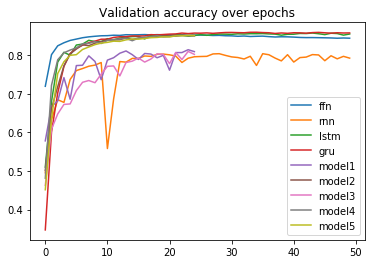

In [83]:
for model in models_list:
    plt.plot(model.history['val_acc'])
    
plt.legend(['ffn', 'rnn', 'lstm', 'gru', 'model1', 'model2', 'model3', 'model4', 'model5'])
plt.title('Validation accuracy over epochs')
plt.show()

*9.Select the best performing model based on the validation set and evaluate its performance using the test set. Assume that with hand-coding we can achieve a 95% accuracy rate. Would your neural network perform better or worse than hand-coding?*

From above two plots we can see that, the best performing model is the model with GRU layer because it seems to have the highest validation accuracy and lowest validation loss.

In [84]:
gru.evaluate(test_x, test_y)

69649/69649 [==============================] - 14s 203us/step


[0.5703272305414112, 0.8573848870826176]

The test accuracy rate using GRU model is 85.7%, it performs worse than hand-coding.